In [1]:
print ("hello there")

hello there


In [4]:
# one way to connect to oracle:
import cx_Oracle
con=cx_Oracle.connect('/@oemprd')
con.version

'12.1.0.2.0'

In [5]:
# another way :
%load_ext sql
%sql oracle+cx_oracle://@oemprd

'Connected: @None'

In [6]:
%%sql 
select sysdate from dual

 * oracle+cx_oracle://@oemprd
0 rows affected.


sysdate
2019-12-03 15:58:02


To get target db names as defined in OEM - run below in SQL Developer

Then use target name in subsequent sql in this notebook

<code>
select * from sysman.mgmt$target 
where target_type in ('oracle_database','rac_database')
and host_name like 'orarac%'
and target_name like 'f%'
</code>

extract from OEM repository

In [7]:
%%sql res <<
SELECT 
    to_date(to_char(rollup_timestamp,'MON-YY'),'MON-YY') "Month",
    round(avg(case when column_label='Allocated Space(GB)' then average end),0) "ALLOCATED_GB",
    round(avg(case when column_label='Used Space(GB)' then average end),0) "USED_GB",
    m.target_name
FROM sysman.MGMT$METRIC_DAILY M
WHERE 
m.target_name in ('eisprd.ghc.org','ediprd')
AND m.column_label in ('Allocated Space(GB)','Used Space(GB)' )
and m.rollup_timestamp>sysdate-360
group by to_date(to_char(rollup_timestamp,'MON-YY'),'MON-YY'), m.target_name 
order by 1


 * oracle+cx_oracle://@oemprd
0 rows affected.
Returning data to local variable res


In [8]:
res

Month,allocated_gb,used_gb,target_name
2018-12-01 00:00:00,448,203,eisprd.ghc.org
2019-01-01 00:00:00,451,206,eisprd.ghc.org
2019-02-01 00:00:00,2236,1997,ediprd
2019-02-01 00:00:00,463,209,eisprd.ghc.org
2019-03-01 00:00:00,470,213,eisprd.ghc.org
2019-03-01 00:00:00,2293,2035,ediprd
2019-04-01 00:00:00,2355,2104,ediprd
2019-04-01 00:00:00,473,217,eisprd.ghc.org
2019-05-01 00:00:00,480,225,eisprd.ghc.org
2019-05-01 00:00:00,2467,2206,ediprd


Text(0.5, 1.0, 'ediprd')

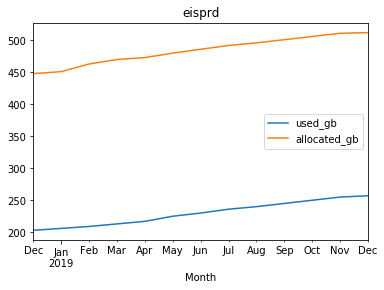

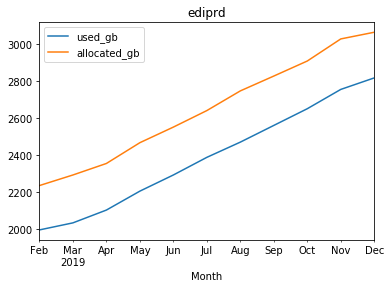

In [36]:
# convert to dataframe and plot
df_eisprd=res.DataFrame().query('target_name=="eisprd.ghc.org"')
df_eisprd.plot(x="Month", y=["used_gb","allocated_gb"]).set_title('eisprd')

df_ediprd=res.DataFrame().query('target_name=="ediprd"')
df_ediprd.plot(x="Month", y=["used_gb","allocated_gb"]).set_title('ediprd')


In [10]:
# combine and plot
import pandas as pd
df_combined=pd.merge(df_eisprd, df_ediprd, on='Month')
df_combined['eisprd_allocated_gb']=df_combined['allocated_gb_x']
df_combined['ediprd_allocated_gb']=df_combined['allocated_gb_y']
df_combined

,Month,allocated_gb_x,used_gb_x,target_name_x,allocated_gb_y,used_gb_y,target_name_y,eisprd_allocated_gb,ediprd_allocated_gb
0,2019-02-01,463,209,eisprd.ghc.org,2236,1997,ediprd,463,2236
1,2019-03-01,470,213,eisprd.ghc.org,2293,2035,ediprd,470,2293
2,2019-04-01,473,217,eisprd.ghc.org,2355,2104,ediprd,473,2355
3,2019-05-01,480,225,eisprd.ghc.org,2467,2206,ediprd,480,2467
4,2019-06-01,486,230,eisprd.ghc.org,2551,2293,ediprd,486,2551
5,2019-07-01,492,236,eisprd.ghc.org,2640,2388,ediprd,492,2640
6,2019-08-01,496,240,eisprd.ghc.org,2746,2470,ediprd,496,2746
7,2019-09-01,501,245,eisprd.ghc.org,2826,2560,ediprd,501,2826
8,2019-10-01,506,250,eisprd.ghc.org,2907,2650,ediprd,506,2907
9,2019-11-01,511,255,eisprd.ghc.org,3026,2754,ediprd,511,3026


Text(0.5, 1.0, 'GB')

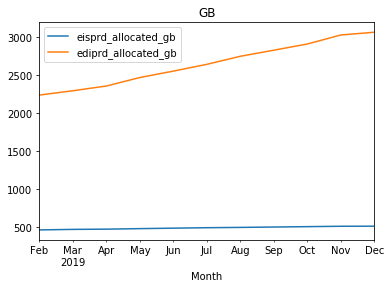

In [11]:
df_combined.plot(x="Month", y=["eisprd_allocated_gb","ediprd_allocated_gb"]).set_title('GB')

In [39]:
# add calculated column "allocated-used" for use in a stacked chart
df_ediprd['allocated_minus_used'] = df_ediprd.allocated_gb - df_ediprd.used_gb
df_ediprd

,Month,allocated_gb,used_gb,target_name,allocated_minus_used
2,2019-02-01,2236,1997,ediprd,239
5,2019-03-01,2293,2035,ediprd,258
6,2019-04-01,2355,2104,ediprd,251
9,2019-05-01,2467,2206,ediprd,261
11,2019-06-01,2551,2293,ediprd,258
13,2019-07-01,2640,2388,ediprd,252
14,2019-08-01,2746,2470,ediprd,276
16,2019-09-01,2826,2560,ediprd,266
18,2019-10-01,2907,2650,ediprd,257
20,2019-11-01,3026,2754,ediprd,272


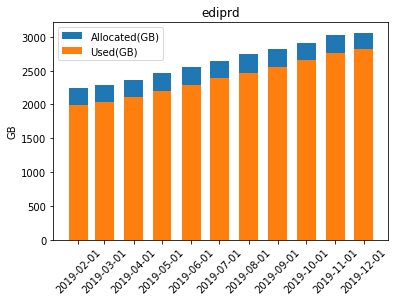

In [41]:
# dataframe plot shows time portion on X axis
# need to format as DD-MM-YYYY 
# this is issue with pandas dataframe plot not allowing date customization
# workaround is to plot with matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(6, 4)) # size in inches

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

month=df_ediprd.Month
used_gb=df_ediprd.used_gb
allocated_gb=df_ediprd.allocated_gb
allocated_minus_used=df_ediprd.allocated_minus_used
allocated_minus_used

ax.bar(month,allocated_gb, width=20,label='Allocated(GB)')
ax.bar(month,used_gb, width=20,label='Used(GB)')
#ax.bar(month,allocated_minus_used,bottom=used_gb, width=20,label='Allocated-Used')

ax.tick_params(axis="x", labelbottom=True, rotation=45)

plt.title('ediprd')
plt.ylabel('GB')
ax.legend(loc='best')
plt.show()
